# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [8]:
df = pd.read_csv('lab12_files/US_Baby_Names_right.csv')
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [9]:
baby_names = df
display(baby_names.describe())
display(pd.DataFrame(baby_names.dtypes))
print(baby_names.shape)

,Unnamed: 0,Id,Year,Count
count,1.016395e+06,1.016395e+06,1.016395e+06,1.016395e+06
mean,2.830990e+06,2.830991e+06,2.009053e+03,3.485012e+01
std,1.652476e+06,1.652476e+06,3.138293e+00,9.739735e+01
min,1.134900e+04,1.135000e+04,2.004000e+03,5.000000e+00
25%,1.317326e+06,1.317328e+06,2.006000e+03,7.000000e+00
50%,2.811920e+06,2.811921e+06,2.009000e+03,1.100000e+01
75%,4.242554e+06,4.242556e+06,2.012000e+03,2.600000e+01
max,5.647425e+06,5.647426e+06,2.014000e+03,4.167000e+03


,0
Unnamed: 0,int64
Id,int64
Name,object
Year,int64
Gender,object
State,object
Count,int64


(1016395, 7)


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [10]:
display(baby_names.head(10))

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [11]:
baby_names.drop(labels=['Unnamed: 0', 'Id'], axis=1, inplace=True)
display(baby_names)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [12]:
print("Srednia: {}".format(grouped["Count"].mean()))
print("Std: {}".format(grouped["Count"].std()))
print("Mediana: {}".format(grouped["Count"].median()))== 'M'])))

SyntaxError: unmatched ']' (922429430.py, line 3)

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [13]:
grouped = baby_names.groupby("Name")
most_comon = grouped["Count"].sum().reset_index().sort_values(by="Count", ascending=False).head(10)
display(most_comon)

,Name,Count
7198,Jacob,242874
5378,Emma,214852
12111,Michael,214405
5579,Ethan,209277
6973,Isabella,204798
16746,William,197894
8568,Joshua,191551
15373,Sophia,191446
4166,Daniel,191440
5367,Emily,190318


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

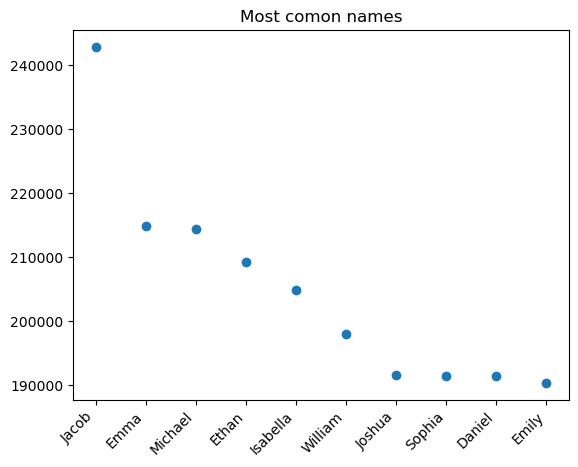

In [14]:
plt.scatter(most_comon["Name"], most_comon["Count"])
plt.xticks(rotation=45, ha='right')
plt.title("Most comon names")
plt.show()

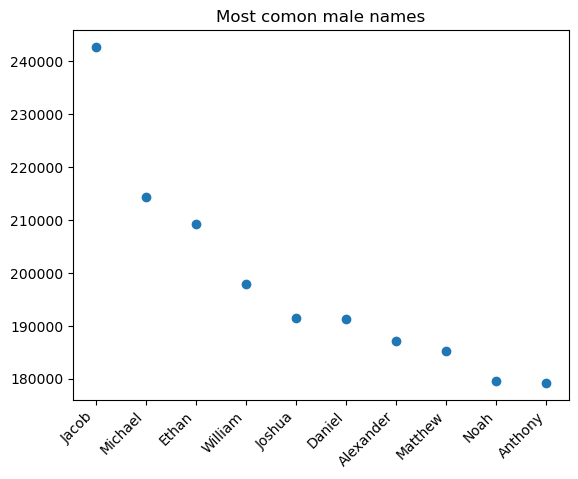

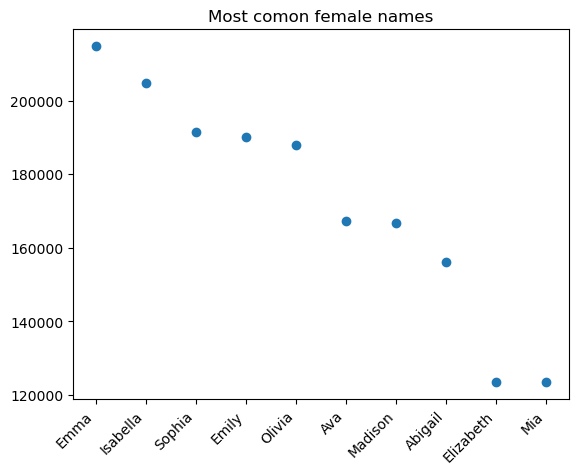

In [15]:
male = baby_names[baby_names["Gender"] == 'M'].groupby("Name")["Count"].sum().reset_index().sort_values(by="Count", ascending=False).head(10)
female = baby_names[baby_names["Gender"] == 'F'].groupby("Name")["Count"].sum().reset_index().sort_values(by="Count", ascending=False).head(10) 

plt.scatter(male["Name"], male["Count"])
plt.xticks(rotation=45, ha='right')
plt.title("Most comon male names")
plt.show()

plt.scatter(female["Name"], female["Count"])
plt.xticks(rotation=45, ha='right')
plt.title("Most comon female names")
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [16]:
baby_names["Name"].nunique()

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [17]:
def generate_name():    
    grouped = pd.DataFrame(baby_names.groupby("Name")["Count"].sum().reset_index())
    grouped["Probability"] = grouped["Count"] / grouped["Count"].sum()
    display(grouped)
    while True:  
        yield grouped.sample(n=1, weights=grouped["Probability"]).iat[0, 0]

name_generator = generate_name()

for n in range(25):
    display(next(name_generator))

,Name,Count,Probability
0,Aaban,12,3.387774e-07
1,Aadan,23,6.493233e-07
2,Aadarsh,5,1.411572e-07
3,Aaden,3426,9.672094e-05
4,Aadhav,6,1.693887e-07
...,...,...,...
17627,Zyra,42,1.185721e-06
17628,Zyrah,11,3.105459e-07
17629,Zyren,6,1.693887e-07
17630,Zyria,59,1.665655e-06


'Sierra'

'Jeremiah'

'Alexandra'

'Ayden'

'Teagan'

'Elizabeth'

'Josiah'

'Lillian'

'Judith'

'Elizabeth'

'Bristol'

'Laila'

'Emmanuelle'

'Danica'

'Adam'

'Corbin'

'Emma'

'Trinity'

'Kaiden'

'Alexander'

'Savannah'

'Todd'

'Kaydence'

'Fabian'

'Maddox'

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [18]:
grouped = pd.DataFrame(baby_names.groupby("Name")["Count"].sum().reset_index())
print("Najpopularniejsze imie: {}".format(grouped.iloc[grouped["Count"].idxmax()]["Name"]))
display(baby_names.groupby("Name")["Count"].agg(["median", "mean", "std"]))

Najpopularniejsze imie: Jacob


,median,mean,std
Name,,,
Aaban,6.0,6.000000,0.000000
Aadan,5.5,5.750000,0.957427
Aadarsh,5.0,5.000000,NaN
Aaden,10.0,17.479592,21.154974
Aadhav,6.0,6.000000,NaN
...,...,...,...
Zyra,6.0,6.000000,1.154701
Zyrah,5.5,5.500000,0.707107
Zyren,6.0,6.000000,NaN


## Część II

Krok 1: Wczytaj dane

In [19]:
df = pd.read_csv('lab12_files/ocupation.csv', sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [20]:
df.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [21]:
df.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [22]:
print("Liczba obserwacji: {}".format(df.shape[0]))
print("Liczba kolumn: {}".format(df.shape[1]))

Liczba obserwacji: 943
Liczba kolumn: 5


Krok 5: Wypisz nazwy kolumn

In [23]:
print(list(df.columns))

['user_id', 'age', 'gender', 'occupation', 'zip_code']


Krok 6: Ile różnych zawodów jest w zbiorze?

In [24]:
df['occupation'].nunique()

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

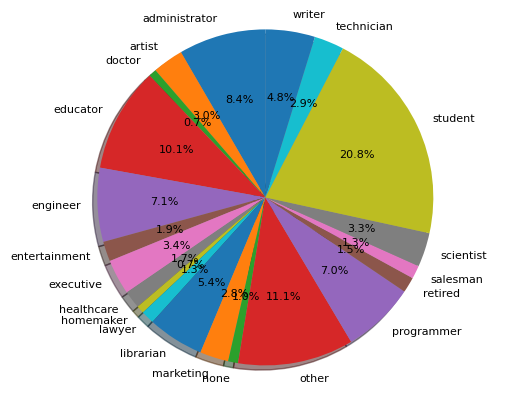

In [78]:
data = df.groupby('occupation').agg(count=('occupation', 'count')).reset_index()

fig1, ax1 = plt.subplots()
ax1.pie(data["count"], labels=data['occupation'], autopct='%1.1f%%',
        shadow=True, textprops={'fontsize': 8}, startangle=90)
ax1.axis('equal') 
plt.show()

,occupation,count
0,student,196
1,other,105
2,educator,95
3,administrator,79
4,engineer,67
5,programmer,66
6,librarian,51
7,writer,45
8,executive,32
9,scientist,31


,occupation,count
1,other,281
0,student,196
2,educator,95
3,administrator,79
4,engineer,67
5,programmer,66
6,librarian,51
7,writer,45
8,executive,32
9,scientist,31


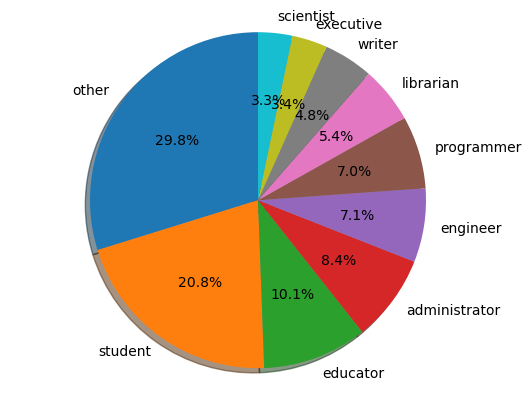

In [81]:
srted = data.sort_values(by='count', ascending=False).reset_index(drop=True)   
display(srted)
if 'other' in srted[:10]['occupation'].values:
   srted.loc[srted['occupation'] == 'other', 'count'] += srted[10:]['count'].sum()
else:
   index = srted.loc[srted['occupation'] == 'other', 'count'].index
   srted.loc[index, 'count'] += srted[10:index.values[0]]['count'].sum() + srted[index.values[0] + 1:]['count'].sum()

 
srted = srted.sort_values(by='count', ascending=False).head(10)
display(srted)

fig1, ax1 = plt.subplots()
ax1.pie(srted["count"], labels=srted['occupation'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

,occupation,count
0,student,196
1,other,105
2,educator,95
3,administrator,79
4,engineer,67
5,programmer,66
6,librarian,51
7,writer,45
8,executive,32
9,scientist,31


,occupation,gender,count
0,student,M,136
1,other,M,69
2,educator,M,69
3,administrator,M,43
4,engineer,M,65
5,programmer,M,60
6,librarian,M,22
7,writer,M,26
8,executive,M,29
9,scientist,M,28


,occupation,gender,count
0,student,F,60
1,other,F,36
2,educator,F,26
3,administrator,F,36
4,engineer,F,2
5,programmer,F,6
6,librarian,F,29
7,writer,F,19
8,executive,F,3
9,scientist,F,3


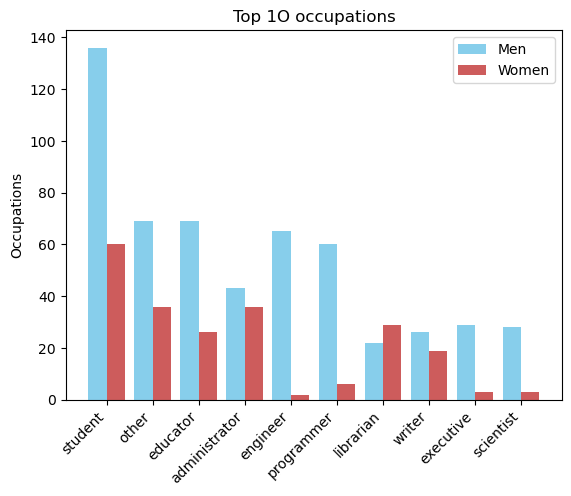

In [110]:
top_10 = df.groupby('occupation').agg(count=('occupation', 'count')).sort_values(by='count', ascending=False).reset_index().head(10)
display(top_10)
grouped_by_gender = df.groupby(['occupation', 'gender']).agg(count=('occupation', 'count')).reset_index()
males = pd.merge(top_10.drop('count', axis=1), grouped_by_gender[grouped_by_gender['gender'] == 'M'], on='occupation', how='left')
females = pd.merge(top_10.drop('count', axis=1), grouped_by_gender[grouped_by_gender['gender'] == 'F'], on='occupation', how='left')
display(males)
display(females)

ind = np.arange(len(top_10)) * 2
width = 0.8

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, males['count'], width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, females['count'], width,
                color='IndianRed', label='Women')

ax.set_ylabel('Occupations')
ax.set_title('Top 1O occupations')
ax.set_xticks(ind)
ax.set_xticklabels(top_10['occupation'], rotation=45, ha='right')
ax.legend()
plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

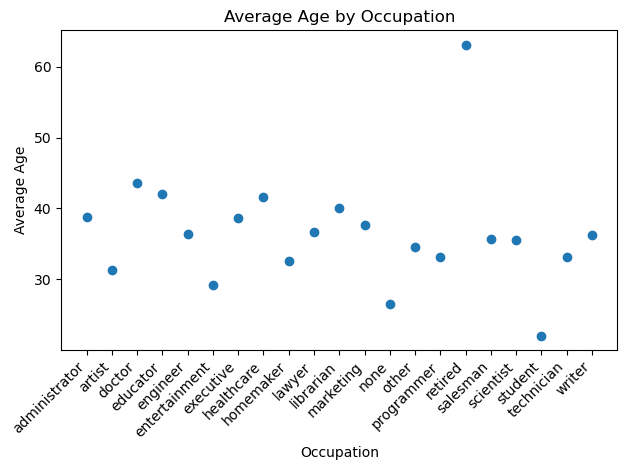

In [117]:
dd = df.groupby('occupation').agg(avg=('age', 'mean')).reset_index()
fig, ax = plt.subplots()
ax.scatter(dd['occupation'], dd['avg'])
ax.set_xticks(range(len(dd['occupation'])))
ax.set_xticklabels(dd['occupation'], rotation=45, ha='right')
ax.set_xlabel('Occupation')
ax.set_ylabel('Average Age')
ax.set_title('Average Age by Occupation')
plt.tight_layout()  
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

,occupation,gender,avg
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


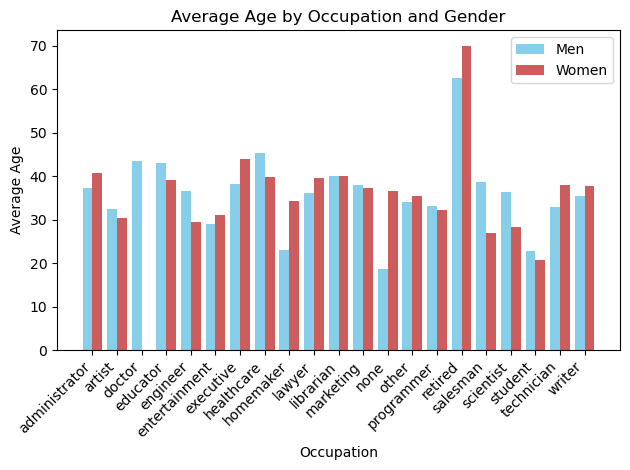

In [128]:
dd = df.groupby(['occupation', 'gender']).agg(avg=('age', 'mean')).reset_index()
display(dd)

occupations = dd['occupation'].unique()

ind = np.arange(len(occupations)) * 2
width = 0.8

men_avg = dd[dd['gender'] == 'M'].set_index('occupation').reindex(occupations)['avg'].fillna(0)
women_avg = dd[dd['gender'] == 'F'].set_index('occupation').reindex(occupations)['avg'].fillna(0)

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_avg, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_avg, width, color='IndianRed', label='Women')

ax.set_xticks(ind)
ax.set_xticklabels(occupations, rotation=45, ha='right')

ax.set_xlabel('Occupation')
ax.set_ylabel('Average Age')
ax.set_title('Average Age by Occupation and Gender')
ax.legend()

plt.tight_layout()
plt.show()
